In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter
import seaborn as sns
import numpy as np
import pandas as pd

In [14]:
# Load training data
with open('train_data.txt', 'r', encoding='utf-8') as file:
    train_data = file.readlines()

# Load test data
with open('test_data.txt', 'r', encoding='utf-8') as file:
    test_data = file.readlines()

In [15]:
# Extract plot summaries and genres from training data
train_plot_summaries = [line.split(':::')[2].strip() for line in train_data]
train_genres = [line.split(':::')[1].strip() for line in train_data]

# Extract plot summaries and genres from test data
test_plot_summaries = [line.split(':::')[2].strip() for line in test_data]
test_genres = [line.split(':::')[1].strip() for line in test_data]

In [16]:
# Check the distribution of genre labels in the training data
genre_counts = Counter(train_genres)
print("Genre Distribution in Training Data:")
for genre, count in genre_counts.items():
    print(f"{genre}: {count}")

Genre Distribution in Training Data:
Oscar et la dame rose (2009): 1
Cupid (1997): 1
Young, Wild and Wonderful (1980): 1
The Secret Sin (1915): 1
The Unrecovered (2007): 1
Quality Control (2011): 1
"Pink Slip" (2009): 1
One Step Away (1985): 1
"Desperate Hours" (2016): 1
Spirits (2014/I): 1
The Spirit World: Ghana (2016): 1
In the Gloaming (1997): 1
Pink Ribbons: One Small Step (2009): 1
Interrabang (1969): 1
The Glass Menagerie (1973): 1
Night Call (2016): 1
Babylon Vista (2001): 1
"Wo Grafen schlafen - Eine Schlösser-Reise" (2014): 1
"Roller Warriors" (2009): 1
Bird Idol (2010): 1
O Signo das Tetas (2016): 1
Söderpojkar (1941): 1
Tunnel Vision (1976): 1
Wedded Bliss? (2002): 1
Cheongchun highway (1973): 1
The Sandman (????/I): 1
Riding Shotgun (2004): 1
The Day Mars Invaded Earth (1963): 1
The Blue Boy (1994): 1
Cracked Not Broken (2007): 1
Love Bites (2018): 1
7 días con Alberto Corazón (2015): 1
Province 77 (2002): 1
"The Wild, Wild World of Animals" (1973): 1
The Derek Trucks Band

Nergis Hanim (2014): 1
"The Infinite Crisis Experience" (2014): 1
Gospod Golob (2016): 1
"The School That Rocks" (2014): 1
The Flute (2012): 1
Star Spangled Banners (2013): 1
The Chain Invisible (1916): 1
Zach Braff's Millionth Fan Contest Project (2011): 1
"The Mortified Sessions" (2011): 1
Ente gut! (2016): 1
Deadpool: From Comics to Screen... to Screen (2016): 1
Black Cat (Gatto nero) (1981): 1
"Power of Peace" (2001): 1
Transcendent (2012): 1
A Movie for You (2015): 1
Harlow (1965/II): 1
Marie's Orchard (2013): 1
Ama, de mer en fille (2015): 1
This Land Is Your Land (2004): 1
Hu quan (1973): 1
Citizens United (2016): 1
Uka i Bjeshkëve të nemura (1968): 1
Les guirlandes merveilleuses (1909): 1
Learning to Surf with Surfer Joe: The Ocean, You & Your Board (2001): 1
Tony Roberts: I'm Different (2013): 1
Foreigners (2012): 1
Smoke & Ash (2016): 1
Hallo Janine! (1939): 1
La boda de Quinita Flores (1943): 1
Hum (2017/II): 1
Love Therapy (2012): 1
The Mitchell Tapes (2010): 1
Last Licks (

In [18]:
# Data preprocessing
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True, max_features=5000)
X_train = vectorizer.fit_transform(train_plot_summaries)
X_test = vectorizer.transform(test_plot_summaries)

In [19]:
# Convert genres to numerical labels
genres = list(set(train_genres)) + list(set(test_genres))
genre_to_label = {genre: idx for idx, genre in enumerate(genres)}
y_train = [genre_to_label[genre] for genre in train_genres]
y_test = [genre_to_label[genre] for genre in test_genres]

In [20]:
# Model selection and training
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

MemoryError: Unable to allocate 21.9 GiB for an array with shape (54214, 54214) and data type float64

In [ ]:
# Predictions
y_pred = clf.predict(X_test)

In [ ]:
# Convert numerical labels back to genres
label_to_genre = {idx: genre for genre, idx in genre_to_label.items()}
y_test_genre = [label_to_genre[label] for label in y_test]
y_pred_genre = [label_to_genre[label] for label in y_pred]

In [ ]:
# Evaluation
print("Accuracy:", accuracy_score(y_test_genre, y_pred_genre))
print(classification_report(y_test_genre, y_pred_genre))

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test_genre, y_pred_genre, labels=genres)
cm_df = pd.DataFrame(cm, index=genres, columns=genres)

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# Feature importance
feature_importance = clf.coef_[0]
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

NameError: name 'pos' is not defined

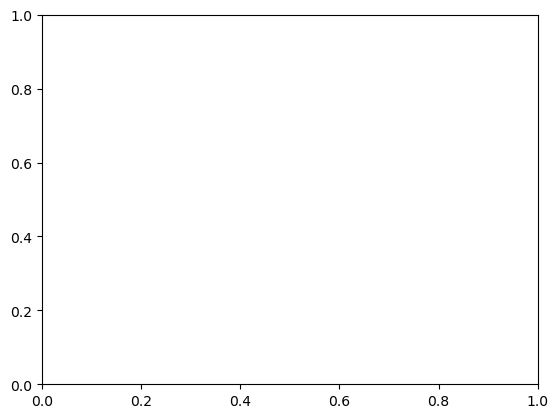

In [21]:
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(vectorizer.get_feature_names())[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

In [ ]:
plt.tight_layout()   
plt.show()